In [1]:
#//extrair dados do wikipedia de uma tabela dos nobeis de Física e mostrar em um dataframe


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4 as BeautifulSoup
import plotly.express as px
from collections import Counter


# In[2]:


#extrair dados do wikipedia
url = 'https://pt.wikipedia.org/wiki/Laureados_com_o_Nobel_de_Física'
r = requests.get(url)
df = pd.read_html(r.text)[0]



In [2]:
df

,Ano,Nº,Imagem,Laureado[nota 1],País[nota 2],Citação[nota 3]
0,1901,1,NaN,Wilhelm Conrad Röntgen,Alemanha,"""em reconhecimento aos serviços extraordinário..."
1,1902,2,NaN,Hendrik Lorentz,Países Baixos,"""em reconhecimento aos extraordinários serviço..."
2,1902,3,NaN,Pieter Zeeman,Países Baixos,"""em reconhecimento aos extraordinários serviço..."
3,1903,4,NaN,Antoine Henri Becquerel,França,"""pela sua descoberta da radioatividade espontâ..."
4,1903,5,NaN,Pierre Curie,França,"""pelas suas pesquisas conjunta sobre o fenômen..."
...,...,...,...,...,...,...
220,2020,215,NaN,Reinhard Genzel,Alemanha,"""pela descoberta de um objeto compacto superma..."
221,2020,216,NaN,Andrea Ghez,Estados Unidos,"""pela descoberta de um objeto compacto superma..."
222,2021,217,NaN,Syukuro Manabe,Japão,"""pela modelagem física do clima da Terra, quan..."
223,2021,218,NaN,Klaus Hasselmann,Alemanha,"""pela modelagem física do clima da Terra, quan..."


In [3]:
#fazer o rename das colunas no df
df.rename(columns={'Laureado[nota 1]': 'Laureados'}, inplace=True)
df.rename(columns={'País[nota 2]': 'Países'}, inplace=True)
df.rename(columns={'Citação[nota 3]': 'Citação'}, inplace=True)

In [4]:
#contagem por Países
df.groupby('Países').count()

,Ano,Nº,Imagem,Laureados,Citação
Países,,,,,
Alemanha,16,16,0,16,16
Alemanha Ocidental,9,9,0,9,9
Alemanha Suíça,1,1,0,1,1
Alemanha Áustria-Hungria,1,1,0,1,1
Austrália,1,1,0,1,1
Austrália Estados Unidos,1,1,0,1,1
Bélgica,1,1,0,1,1
Canadá,4,4,0,4,4
Canadá/ Estados Unidos,1,1,0,1,1


In [5]:
#os top 10 paises que tem mais laureados
df.groupby('Países').count().sort_values(by='Laureados', ascending=False).head(10)



,Ano,Nº,Imagem,Laureados,Citação
Países,,,,,
Estados Unidos,82,82,0,82,82
Reino Unido,19,19,0,19,19
Alemanha,16,16,0,16,16
França,12,12,0,12,12
Japão,11,11,0,11,11
Alemanha Ocidental,9,9,0,9,9
Países Baixos,8,8,0,8,8
União Soviética,7,7,0,7,7
Suíça,5,5,0,5,5


In [6]:
dfpaises = df.groupby('Países').count().sort_values(by='Laureados', ascending=False).head(10)

In [7]:
#dropar colunas desnecessárias Ano, Nº,	Imagem e Citação[nota 3]
dfpaises = dfpaises.drop(['Ano', 'Nº', 'Imagem', 'Citação'], axis=1)



In [8]:
dfpaises

,Laureados
Países,
Estados Unidos,82
Reino Unido,19
Alemanha,16
França,12
Japão,11
Alemanha Ocidental,9
Países Baixos,8
União Soviética,7
Suíça,5


In [9]:
print(dfpaises)

                    Laureados
Países                       
Estados Unidos             82
Reino Unido                19
Alemanha                   16
França                     12
Japão                      11
Alemanha Ocidental          9
Países Baixos               8
União Soviética             7
Suíça                       5
Suécia                      4


In [10]:
#plot com o plotly dos 10 paises com mais laureados
fig = px.bar(dfpaises, x="Laureados")
fig.show()


<AxesSubplot:ylabel='Países'>

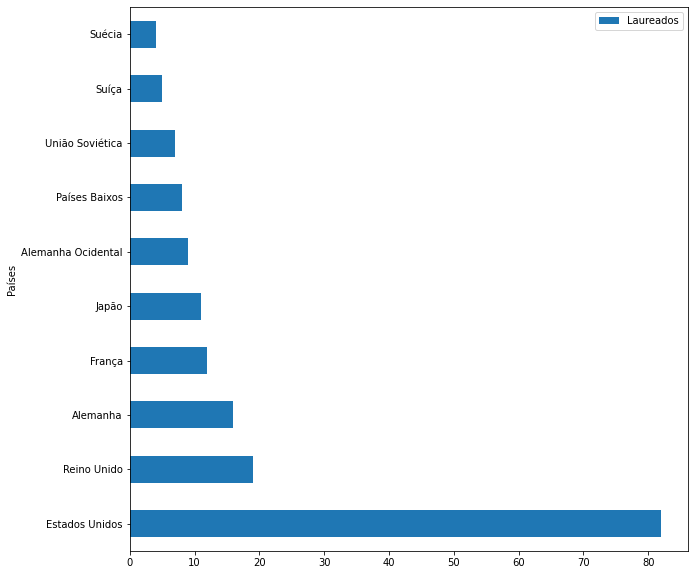

In [11]:
#plot das quantidades de paises
dfpaises.plot.barh(figsize=(10,10))

In [12]:
#laureados que foram premiados por mais de uma vez utilizando Counter
print(Counter(df))

Counter({'Ano': 1, 'Nº': 1, 'Imagem': 1, 'Laureados': 1, 'Países': 1, 'Citação': 1})


In [13]:
#laureados que foram premiados por mais de uma vez
Laureados = df.groupby('Laureados').count().sort_values(by='Laureados', ascending=False).head(10)


In [14]:
df

,Ano,Nº,Imagem,Laureados,Países,Citação
0,1901,1,NaN,Wilhelm Conrad Röntgen,Alemanha,"""em reconhecimento aos serviços extraordinário..."
1,1902,2,NaN,Hendrik Lorentz,Países Baixos,"""em reconhecimento aos extraordinários serviço..."
2,1902,3,NaN,Pieter Zeeman,Países Baixos,"""em reconhecimento aos extraordinários serviço..."
3,1903,4,NaN,Antoine Henri Becquerel,França,"""pela sua descoberta da radioatividade espontâ..."
4,1903,5,NaN,Pierre Curie,França,"""pelas suas pesquisas conjunta sobre o fenômen..."
...,...,...,...,...,...,...
220,2020,215,NaN,Reinhard Genzel,Alemanha,"""pela descoberta de um objeto compacto superma..."
221,2020,216,NaN,Andrea Ghez,Estados Unidos,"""pela descoberta de um objeto compacto superma..."
222,2021,217,NaN,Syukuro Manabe,Japão,"""pela modelagem física do clima da Terra, quan..."
223,2021,218,NaN,Klaus Hasselmann,Alemanha,"""pela modelagem física do clima da Terra, quan..."


In [15]:
#os paises dos ultimos 10 anos antes de 2021

df.tail(30)

,Ano,Nº,Imagem,Laureados,Países,Citação
195,2011,190,NaN,Saul Perlmutter,Estados Unidos,"""pela descoberta da expansão acelerada do univ..."
196,2011,191,NaN,Brian Schmidt,Austrália Estados Unidos,"""pela descoberta da expansão acelerada do univ..."
197,2011,192,NaN,Adam Riess,Estados Unidos,"""pela descoberta da expansão acelerada do univ..."
198,2012,193,NaN,Serge Haroche,França,"""por métodos experimentais inovadores que perm..."
199,2012,194,NaN,David Wineland,Estados Unidos,"""por métodos experimentais inovadores que perm..."
200,2013,195,NaN,François Englert,Bélgica,"""pela descoberta do mecanismo que contribuiu p..."
201,2013,196,NaN,Peter Higgs,Reino Unido,"""pela descoberta do mecanismo que contribuiu p..."
202,2014,197,NaN,Isamu Akasaki,Japão,"""pela invenção de diodos azuis emissores de lu..."
203,2014,198,NaN,Hiroshi Amano,Japão,"""pela invenção de diodos azuis emissores de lu..."
204,2014,199,NaN,Shuji Nakamura,Japão,"""pela invenção de diodos azuis emissores de lu..."


In [16]:
df2021 = df.tail(30)

In [17]:
df10 = df2021.groupby('Países').count().sort_values(by='Laureados', ascending=False)
df10

,Ano,Nº,Imagem,Laureados,Citação
Países,,,,,
Estados Unidos,8,8,0,8,8
Japão,5,5,0,5,5
"Reino Unido, Estados Unidos",3,3,0,3,3
Alemanha,2,2,0,2,2
Canadá,2,2,0,2,2
França,2,2,0,2,2
Reino Unido,2,2,0,2,2
Suíça,2,2,0,2,2
Austrália Estados Unidos,1,1,0,1,1


In [18]:
#plot com o plotly com os ultimos 10 anos de 2011 ate 2021
fig = px.bar(df10, x="Laureados")
fig.show()